# TITANIC

In this project, I will apply the Classification algorithms to survival datas of the sinking of Titanic. Data is taken from the Kaggle.

### Data Dictionary

* PassengerId: Unique identifier for each passenger.<br>
* Survived: Indicates whether the passenger survived or not - 0 (did not survive) or 1 (survived).<br>
* Pclass: Passenger class. 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class.<br>
* Name: Full name of the passenger.<br>
* Sex: Passenger's gender, "male" or "female".<br>
* Age: Passenger's age.<br>
* SibSp: Number of siblings/spouses the passenger had aboard the ship.<br>
* Parch: Number of parents/children the passenger had aboard the ship.<br>
* Ticket: Passenger's ticket number.<br>
* Fare: Passenger's ticket fare.<br>
* Cabin: Passenger's cabin number.<br>
* Embarked: Port where the passenger embarked the ship, "S" (Southampton), "C" (Cherbourg) or "Q" (Queenstown).

<img src='https://miro.medium.com/v2/resize:fit:1400/1*iOCbIdKMy2I2sUsNBMES5Q.jpeg'>
<br>
<img src='https://i.guim.co.uk/img/media/5edc4d7ab8f12298d1c751e9598492219d8403f3/0_0_915_549/master/915.jpg?width=465&dpr=1&s=none'> <br>
<br>
<a href='https://www.kaggle.com/competitions/titanic' target= _blank> Can get data from this link

# Imports

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

### EDA - Exploratory Data Analysis

In [2]:
#Import data
df_train = pd.read_csv("ttrain.csv")
df_test = pd.read_csv("ttest.csv")

PassengerId = df_test['PassengerId']

In [3]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [4]:

#Merge two dfs
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(1309, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df.shape

(1309, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

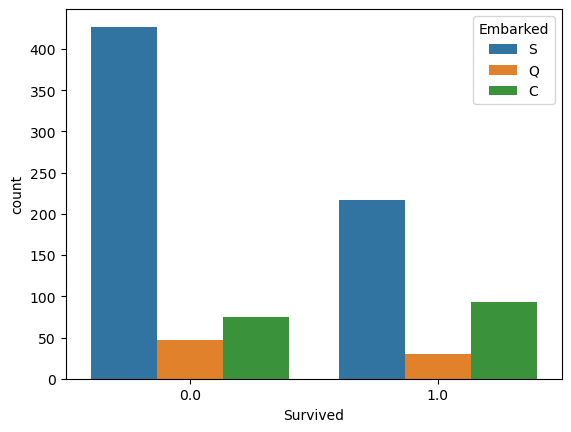

In [11]:
sns.countplot(x= 'Survived', hue = 'Embarked', data=df);

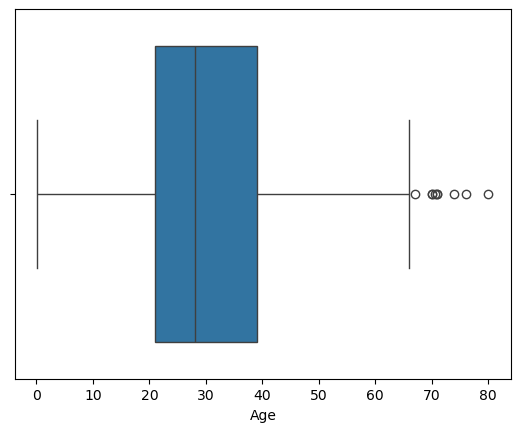

In [12]:
sns.boxplot(x = df["Age"]);

In [13]:
df["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

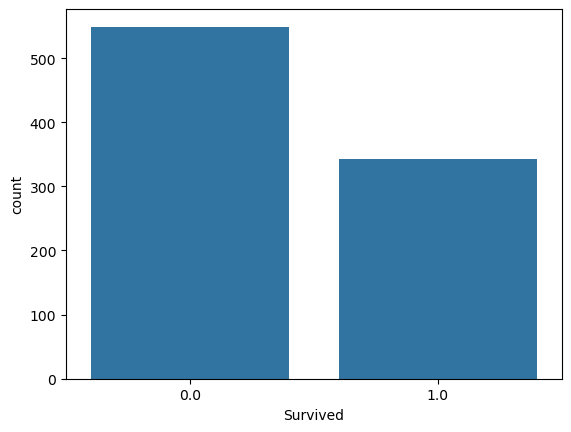

In [14]:
sns.countplot(x=df['Survived'])

In [15]:
px.bar(df, x = 'Pclass', y = 'Survived', color = 'Age')


### Feature Engineering

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [17]:
df["Age"].median()

28.0

In [18]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [19]:
df['Age'] = df['Age'].astype(int)

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [22]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.drop(columns=['Cabin'], inplace=True)


In [25]:
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [27]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked','Pclass'], drop_first=True)

In [28]:
# df dataframeinden Survived alanı dolu olan kayıtları train dataframeine, Survived alanı boş olan kayıtları test dataframeine aktar.

train_data = df[df['Survived'].notnull()]
test_data = df[df['Survived'].isnull()]

test_data.drop(columns=['Survived'])

train_data.shape, test_data.shape


((891, 10), (418, 10))

In [29]:
train_data

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,22,1,0,7.2500,True,False,True,False,True
1,1.0,38,1,0,71.2833,False,False,False,False,False
2,1.0,26,0,0,7.9250,False,False,True,False,True
3,1.0,35,1,0,53.1000,False,False,True,False,False
4,0.0,35,0,0,8.0500,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0.0,27,0,0,13.0000,True,False,True,True,False
887,1.0,19,0,0,30.0000,False,False,True,False,False
888,0.0,28,1,2,23.4500,False,False,True,False,True
889,1.0,26,0,0,30.0000,True,False,False,False,False


In [30]:
test_data.drop(columns=['Survived'], inplace = True)

In [31]:
test_data

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
891,34,0,0,7.8292,True,True,False,False,True
892,47,1,0,7.0000,False,False,True,False,True
893,62,0,0,9.6875,True,True,False,True,False
894,27,0,0,8.6625,True,False,True,False,True
895,22,1,1,12.2875,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
1304,28,0,0,8.0500,True,False,True,False,True
1305,39,0,0,108.9000,False,False,False,False,False
1306,38,0,0,7.2500,True,False,True,False,True
1307,28,0,0,8.0500,True,False,True,False,True


In [32]:
# determine x and y variables

x = train_data.drop(columns=['Survived'])
y = train_data['Survived']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algoritma:',algo_names[i])
            print('Confusion Matrix:',confusion_matrixes[i])
            print('Classification Report:',classification_reports[i])
            print('Accuracy Score:',accuracy_scores[i])
            print('---*---*---*---*---*---*---*---*---*---*---*---*---*---*')

In [35]:
algo_test(x,y)

Algoritma: GaussianNB
Confusion Matrix: [[83 20]
 [22 54]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       103
         1.0       0.73      0.71      0.72        76

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179

Accuracy Score: 0.7653631284916201
---*---*---*---*---*---*---*---*---*---*---*---*---*---*
Algoritma: BernoulliNB
Confusion Matrix: [[89 23]
 [16 51]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       112
         1.0       0.69      0.76      0.72        67

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179

Accuracy Score: 0.7821229050279329
---*---*---*---*---*---*---*---*---*---*---*---*---*--

In [36]:
#RandomForestClassifier is the best classifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(test_data)




In [37]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [38]:
#create a dataframe that includes passengerid of df_test and y_pred of this passengers survival status.

pred_list = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})
pred_list.to_csv('titanic_perd_list.csv', index=False)




In [39]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_pred})

In [40]:
submission["Survived"] = submission["Survived"].astype('int64')

In [41]:
submission.to_csv('submission.csv', index=False)

In [42]:
pred_list

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
